In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from pprint import pprint

In [2]:
train_df = pd.read_csv('Predictive_Data/train_file.csv')

In [13]:
train_df

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK
5,6,Physical,Horizon,2005,4,4,Minnie and Moo go dancing / [written and illus...,"Cazet, Denys","Cows Juvenile fiction, Parties Fiction, Farm l...","DK Pub.,",c1998.,BOOK
6,7,Physical,Horizon,2005,4,1,cat who robbed a bank,NaN,"Mystery fiction, Qwilleran Jim Fictitious char...",NaN,NaN,BOOK
7,8,Physical,Horizon,2005,4,1,Irwin guide to using the Wall Street journal,NaN,"Wall Street journal, Investments United States...",NaN,NaN,BOOK
8,9,Physical,Horizon,2005,4,4,Oracle night,NaN,Novelists American New York State New York Fic...,NaN,NaN,BOOK
9,10,Physical,Horizon,2005,4,1,12 haunted episodes,NaN,Rock music 1991 2000,NaN,NaN,SOUNDDISC


In [14]:
train_df.isna().sum()

ID                     0
UsageClass             0
CheckoutType           0
CheckoutYear           0
CheckoutMonth          0
Checkouts              0
Title                  0
Creator            23137
Subjects            1763
Publisher          21916
PublicationYear    21931
MaterialType           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4337e4940>,
      dtype=object)

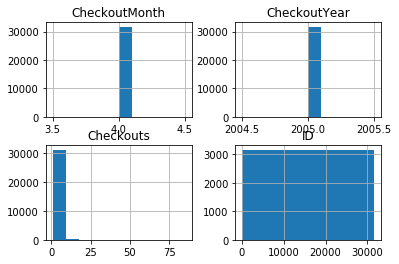

In [15]:
train_df.hist()

## Feature Selection

In [16]:
train_df['UsageClass'].unique()

array(['Physical'], dtype=object)

In [18]:
train_df['CheckoutType'].unique()

array(['Horizon'], dtype=object)

In [19]:
train_df['CheckoutYear'].unique()

array([2005])

In [20]:
train_df['CheckoutMonth'].unique()

array([4])

In [21]:
train_df['Checkouts'].unique()

array([ 1,  3,  4,  2, 16,  5,  6,  7,  8, 18,  9, 21, 10, 34, 12, 14, 15,
       17, 13, 25, 11, 52, 20, 36, 84, 41, 27, 22, 45, 19, 39, 85, 28, 23,
       44, 30, 78, 24, 31, 38, 61, 56, 29, 42, 26, 40, 37, 33, 35, 77])

In [22]:
train_df['PublicationYear'].unique()

array([nan, '1998.', 'c2002.', 'c1998.', '1994.', 'p1999.', '1999.',
       '2004.', 'p1995.', '[1969]', 'c1999.', '[2005],', 'p2003.',
       '2003.', 'c2001.', 'p1998.', '1974.', 'c1992.', 'c2003.', '[1989]',
       'c2004.', 'p1994.', '1992.', 'p2004.', '[1974]', 'c1988.', '1995.',
       '2001.', '2004, c2002.', '2002, c1989.', 'c2000.', 'c1994.',
       '[2001?], p1984.', '1984.', '2002.', '[2003], p1992.', '[1972]',
       '1993.', 'c1986.', 'c1997.', 'c1981.', 'c1933.', '2000.', '1927.',
       'c2005.', '1986, c1969.', '[1955]', '1989.', '[199-?], p1976.',
       '1975.', '[1990].', '[1967]', '1966.', 'pc2002.', '[1999?]',
       'c1996.', 'c1977.', '1996.', '1963, c1961.', '1997.', 'c1984.',
       '1893.', 'c1979.', 'p2001.', 'c1995.', '2005.', '1991, c1963.',
       'p1989.', 'c1990.', 'c1989.', '[1975]', 'c1976.', 'c1991.',
       '[1999]', 'c1985.', '[1998]', '1969.', '2001, c2002.', 'c1983.',
       '1986.', '[1971]', '[1987?]', '[2003]', '2005, c1966.', 'p2002.',
       

#### Conclusion
**Selected Features**
+ ID
+ Title
+ Creator
+ Subjects
+ Publisher
+ MaterialType

In [23]:
del train_df['UsageClass']
del train_df['CheckoutType']
del train_df['CheckoutYear']
del train_df['CheckoutMonth']
del train_df['Checkouts']
del train_df['PublicationYear']

In [24]:
train_df

,ID,Title,Creator,Subjects,Publisher,MaterialType
0,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,BOOK
1,2,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",BOOK
2,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",BOOK
3,4,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,BOOK
4,5,As a man thinketh,NaN,Thought and thinking,NaN,BOOK
5,6,Minnie and Moo go dancing / [written and illus...,"Cazet, Denys","Cows Juvenile fiction, Parties Fiction, Farm l...","DK Pub.,",BOOK
6,7,cat who robbed a bank,NaN,"Mystery fiction, Qwilleran Jim Fictitious char...",NaN,BOOK
7,8,Irwin guide to using the Wall Street journal,NaN,"Wall Street journal, Investments United States...",NaN,BOOK
8,9,Oracle night,NaN,Novelists American New York State New York Fic...,NaN,BOOK
9,10,12 haunted episodes,NaN,Rock music 1991 2000,NaN,SOUNDDISC


### Replace nan values

In [25]:
train_df = train_df.replace(np.nan, 'Unknown')

In [26]:
train_df['MaterialType'].unique()

array(['BOOK', 'SOUNDDISC', 'VIDEOCASS', 'VIDEODISC', 'SOUNDCASS',
       'MUSIC', 'MIXED', 'CR'], dtype=object)

## Using NLP to clean text

In [10]:
import string
punctuations = string.punctuation

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [12]:
import spacy
nlp = spacy.load('en_core_web_md')
nlp.Defaults.stop_words |= {x for x in punctuations}
nlp.Defaults.stop_words |= set(stop_words)

for word in nlp.Defaults.stop_words:
    nlp.vocab[word].is_stop = True

In [13]:
def clean_text(text):
    parsed_data = nlp(text)    
    df1 = pd.DataFrame([(t.text, t.lemma_, t.pos_, t.dep_, t.is_stop) for t in parsed_data], index=range(len(parsed_data)), columns=['text', 'lemma', 'POS', 'DEP', 'IS_STOP'])
    df1 = df1[(df1['POS']=='NOUN') | (df1['DEP']=='ROOT')]
    return ' '.join(list(df1['lemma'].to_dict().values()))

#### Using NLP to clean summary column

In [31]:
train_df['cleaned_subj'] = train_df['Subjects'].apply(clean_text)

#### Saving df to csv file

In [32]:
train_df.to_csv('Predictive_Data/processed_train_file.csv', index=False)

## Modeling & Testing

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['cleaned_subj']).todense()

In [25]:
from sklearn.metrics import confusion_matrix

#### Naive Bayes Model

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict

print(cross_val_score(MultinomialNB(), X, train_df['MaterialType'], scoring='f1_weighted').mean())

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8093917635436091


/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
result = cross_val_predict(MultinomialNB(), X, train_df['MaterialType'], cv=3)
conf_metrix = confusion_matrix(train_df['MaterialType'], result)

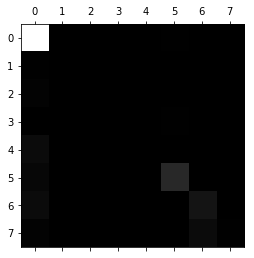

In [27]:
plt.matshow(conf_metrix, cmap=plt.cm.gray)
plt.show()

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(), X, train_df['MaterialType'], scoring='f1_weighted').mean()

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'p

0.8254019809745977

#### SGD Model

In [36]:
from sklearn.linear_model import SGDClassifier
cross_val_score(SGDClassifier(), X, train_df['MaterialType'], scoring='f1_weighted').mean()

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter de

0.8264086926922909

#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(), X, train_df['MaterialType'], scoring='f1_weighted', cv=5).mean()

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

0.8376021568244034

#### Linear SVM

In [40]:
from sklearn.svm import LinearSVC
cross_val_score(LinearSVC(C=1, loss='hinge'), X, train_df['MaterialType'], scoring='f1_weighted').mean()

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8308672969462259

#### Polynomial SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

sc = StandardScaler()
Y = sc.fit_transform(X)
cross_val_score(SVC(kernel='poly', degree=3, coef0=1, C=5), Y, train_df['MaterialType'], scoring='f1_weighted').mean()

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Conclusion
**Conclusion** best results are getting with Random forest classifier

## Final Model creation

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, train_df['MaterialType'])

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Loading Test File

In [8]:
test_df = pd.read_csv('Predictive_Data/test_file.csv')

In [15]:
test_df = test_df.replace(np.nan, 'Unknown')
test_df['cleaned_subj'] = test_df['Subjects'].apply(clean_text)

In [16]:
Y = vectorizer.transform(test_df['cleaned_subj'])
test_df['MaterialType'] = rfc.predict(Y)

In [19]:
submission_df = test_df[['ID', 'MaterialType']]
submission_df.shape

(21102, 2)

In [21]:
submission_df.to_csv('Predictive_Data/submission_P2.csv', index=False)

In [23]:
submission_df

,ID,MaterialType
0,31654,BOOK
1,31655,VIDEOCASS
2,31656,SOUNDDISC
3,31657,BOOK
4,31658,VIDEODISC
5,31659,BOOK
6,31660,SOUNDDISC
7,31661,BOOK
8,31662,BOOK
9,31663,BOOK
